# OIL AND GAS IN THE EAGLEFORD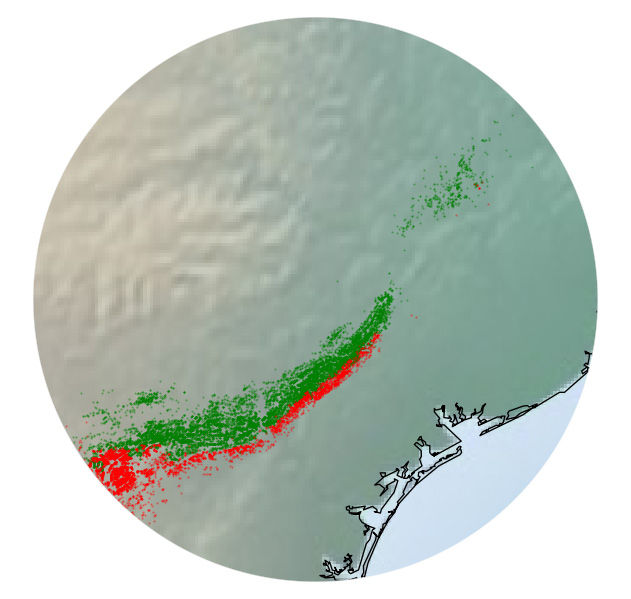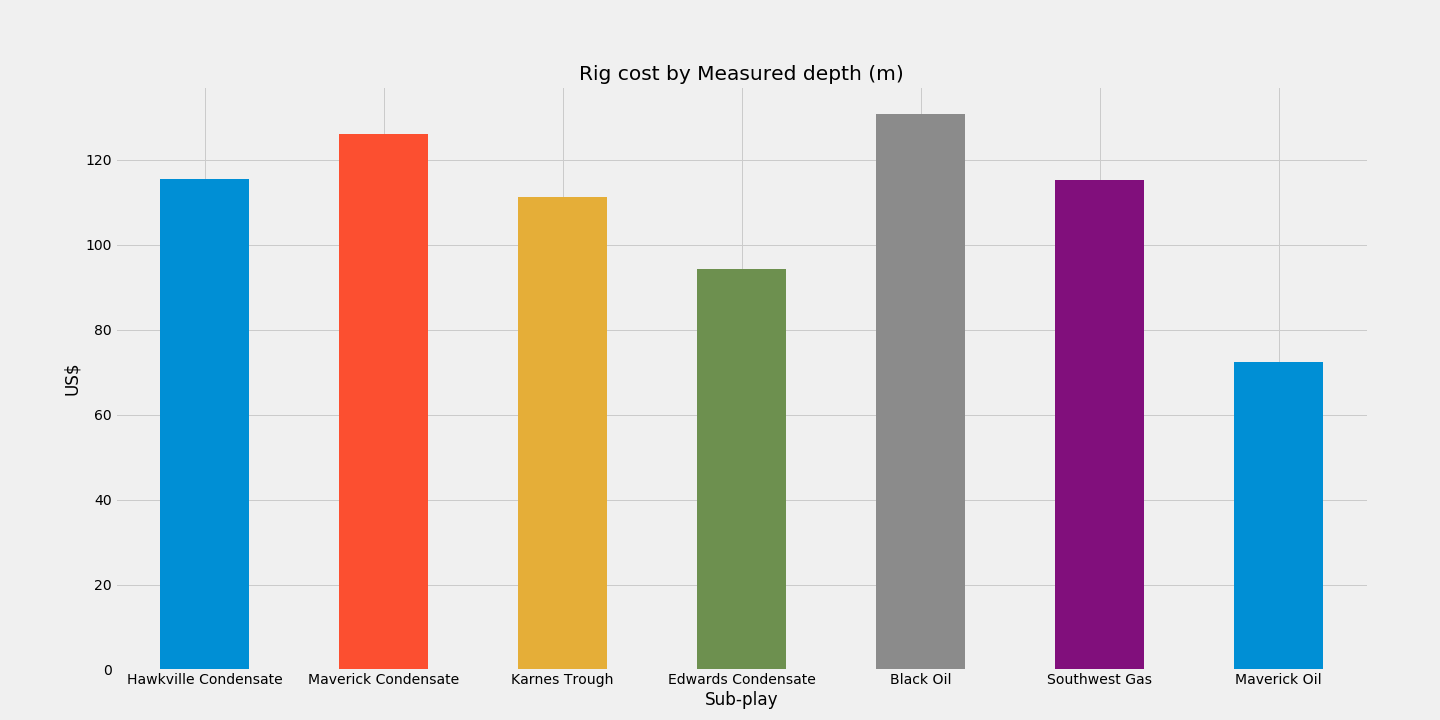


# LIBRARIES

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap
import requests
import openpyxl as xl

% matplotlib inline

# DATA CLEANING

In [37]:
#Import and read xlsx file into a dataframe 
file = "Eagle Ford Data.xlsx"
df = pd.read_excel(file, sheet_name=0)

In [4]:
#Get a list of columns to see which ones are irrelevant 
df.columns

Index(['API', 'Longitude', 'Latitude', 'Bottomhole longitude',
       'Bottomhole latitude', 'Well Number', 'Lease Name', 'Well Type',
       'Permit Type', 'Pad', 'Operator', 'Operator (Subsidiary)',
       'Operator (Original)', 'Operator Thematic Group', 'Operator US Focus',
       'Play', 'Sub-play', 'State', 'County', 'Region', 'Basin', 'Reservoir',
       'Field', 'Permit Date', 'Drilling Start Date', 'Drilling End Date',
       'Completion Date', 'First Production Date', 'IP Date',
       'Vertical Depth (m)', 'Measured Depth (m)', 'Lateral Length (m)',
       'Drilling Days (days)', 'Drilling Speed (m/day)',
       'Fracture Stages (stages)', 'Water (l)', 'Proppant (kg)',
       'API Gravity (degree)', 'Well Cost Total (US$)', 'Rig Cost (US$)',
       'Casing Cost (US$)', 'Water Cost (US$)', 'Proppant Cost (US$)',
       'Pumping Cost (US$)', 'Other Cost (US$)', 'Cum30 Oil (bbl)',
       'Cum60 Oil (bbl)', 'Cum90 Oil (bbl)', 'Cum180 Oil (bbl)',
       'Cum365 Oil (bbl)', 'Cum30

In [5]:
#Drop irrelevant columns
df_subset = df.drop(columns = ['Bottomhole longitude','Bottomhole latitude', 'Well Number', 'Lease Name',
       'Permit Type', 'Pad','Operator (Subsidiary)', 'Operator Thematic Group', 'Operator US Focus', 'Play', 'State', 'Region', 'Basin',
       'Field', 'Permit Date', 'Drilling Start Date', 'Drilling End Date',
       'Completion Date','Fracture Stages (stages)','Cum30 Oil (bbl)',
       'Cum60 Oil (bbl)', 'Cum90 Oil (bbl)', 'Cum30 Gas (mcf)', 'Cum60 Gas (mcf)',
       'Cum90 Gas (mcf)','Cum30 Total (boe)', 'Cum60 Total (boe)', 'Cum90 Total (boe)',
       'Cum180 Total (boe)','bi Oil', 'Di Oil (per month)',
       'Dmin Oil (per year)', 'bi Gas', 'Di Gas (per month)',
       'Dmin Gas (per year)', 'Reservoir', 'Water (l)', 'IP Date'])

In [6]:
#Check if there are duplicate values in API column
df_subset.API.duplicated().sum
#Check data types 
types = df_subset.dtypes
types

API                                int64
Longitude                        float64
Latitude                         float64
Well Type                         object
Operator                          object
Operator (Original)               object
Sub-play                          object
County                            object
First Production Date     datetime64[ns]
Vertical Depth (m)               float64
Measured Depth (m)               float64
Lateral Length (m)               float64
Drilling Days (days)             float64
Drilling Speed (m/day)           float64
Proppant (kg)                    float64
API Gravity (degree)             float64
Well Cost Total (US$)            float64
Rig Cost (US$)                   float64
Casing Cost (US$)                float64
Water Cost (US$)                 float64
Proppant Cost (US$)              float64
Pumping Cost (US$)               float64
Other Cost (US$)                 float64
Cum180 Oil (bbl)                 float64
Cum365 Oil (bbl)

In [7]:
#check shape
df_subset.shape

(17882, 34)

In [8]:
#Dropping rows that contain less than half of observations
df_subset = df_subset.dropna(thresh=16)

#Return a list of columns with missing values
columns = df_subset.columns[df_subset.isnull().any()]

#Fill missing values with average values for that column
for column in columns:
    df_subset[column].fillna(df_subset.groupby("Sub-play")[column].transform("mean"), inplace=True)
df_subset

,API,Longitude,Latitude,Well Type,Operator,Operator (Original),Sub-play,County,First Production Date,Vertical Depth (m),...,Cum365 Oil (bbl),Cum180 Gas (mcf),Cum365 Gas (mcf),Cum365 Total (boe),IP Oil (b/d),IP Gas (mmcfd),IP Total (boe/d),EUR Oil (mmbbl),EUR Gas (bcf),EUR Total (mmboe)
0,42013342710000,-98.332847,28.954002,Oil,EOG Resources,Chaparral Natural Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,17850.000000,6103.000000,10510.000000,19700.000000,83.500000,0.04,89.77,0.082000,0.043000,0.090000
1,42013342730000,-98.455662,28.728584,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,10853.000000,9439.000000,16553.000000,13766.000000,42.340000,0.13,64.09,0.053000,0.156000,0.081000
2,42013342780000,-98.470619,28.698830,Oil,Dewbre Petroleum Corporation,Dewbre Petroleum Corporation,Black Oil,Atascosa,2011-01-03,2975.000000,...,42766.000000,17618.000000,19941.000000,46276.000000,276.450000,0.16,287.40,0.172000,0.120000,0.193000
3,42013342790000,-98.450319,28.726421,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2944.000000,...,10853.000000,9439.000000,16553.000000,13766.000000,42.340000,0.13,64.09,0.053000,0.156000,0.081000
4,42013342850000,-98.439686,28.734653,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,25943.000000,17487.000000,25416.000000,30416.000000,127.350000,0.17,139.48,0.105000,0.119000,0.125000
5,42013342890000,-98.503519,28.712835,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2882.000000,...,22870.000000,12093.000000,19686.000000,26335.000000,128.460000,0.14,145.84,0.092000,0.118000,0.113000
6,42013342900000,-98.443229,28.730629,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,25943.000000,17487.000000,25416.000000,30416.000000,127.350000,0.17,139.48,0.105000,0.119000,0.125000
7,42013342910000,-98.167133,28.789627,Oil,ExxonMobil,XTO Energy,Karnes Trough,Atascosa,2010-01-10,3338.000000,...,4834.000000,2107.000000,2107.000000,5205.000000,793.730000,0.36,843.11,0.482000,0.523000,0.571000
8,42013343040000,-98.342421,28.952621,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,17850.000000,6103.000000,10510.000000,19700.000000,83.500000,0.04,89.77,0.082000,0.043000,0.090000
9,42013343060000,-98.154156,28.776823,Oil,Marathon Oil,Hilcorp Energy,Karnes Trough,Atascosa,2010-01-12,3234.000000,...,38713.000000,16303.000000,20219.000000,42272.000000,196.740000,0.16,225.67,0.173000,0.178000,0.205000


In [12]:
#Confirm there are no missing values 
df_subset.isnull().any()

#There are, so fill in with means for that column
cols = ["Well Cost Total (US$)", "Rig Cost (US$)", "Casing Cost (US$)",  
       "Water Cost (US$)", "Proppant Cost (US$)", "Pumping Cost (US$)", "Other Cost (US$)"]
for col in cols:
    df_subset[col].fillna(df_subset[col].mean(), inplace=True)  

In [13]:
#Check again
df_subset.isnull().any()

API                       False
Longitude                 False
Latitude                  False
Well Type                 False
Operator                  False
Operator (Original)       False
Sub-play                  False
County                    False
First Production Date     False
Vertical Depth (m)        False
Measured Depth (m)        False
Lateral Length (m)        False
Drilling Days (days)      False
Drilling Speed (m/day)    False
Proppant (kg)             False
API Gravity (degree)      False
Well Cost Total (US$)     False
Rig Cost (US$)            False
Casing Cost (US$)         False
Water Cost (US$)          False
Proppant Cost (US$)       False
Pumping Cost (US$)        False
Other Cost (US$)          False
Cum180 Oil (bbl)          False
Cum365 Oil (bbl)          False
Cum180 Gas (mcf)          False
Cum365 Gas (mcf)          False
Cum365 Total (boe)        False
IP Oil (b/d)              False
IP Gas (mmcfd)            False
IP Total (boe/d)          False
EUR Oil 

In [14]:
#Saving clean data to a csv
df_subset.to_csv("clean_data.csv", sep=',', index = False)

# OPERATOR ACTIVITY

# PRODUCTION

# By Sub-Play

In [22]:
#reading file into a dataframe
file = "clean_data.csv"
df = pd.read_csv(file)
df.columns

Index(['API', 'Longitude', 'Latitude', 'Well Type', 'Operator',
       'Operator (Original)', 'Sub-play', 'County', 'First Production Date',
       'Vertical Depth (m)', 'Measured Depth (m)', 'Lateral Length (m)',
       'Drilling Days (days)', 'Drilling Speed (m/day)', 'Proppant (kg)',
       'API Gravity (degree)', 'Well Cost Total (US$)', 'Rig Cost (US$)',
       'Casing Cost (US$)', 'Water Cost (US$)', 'Proppant Cost (US$)',
       'Pumping Cost (US$)', 'Other Cost (US$)', 'Cum180 Oil (bbl)',
       'Cum365 Oil (bbl)', 'Cum180 Gas (mcf)', 'Cum365 Gas (mcf)',
       'Cum365 Total (boe)', 'IP Oil (b/d)', 'IP Gas (mmcfd)',
       'IP Total (boe/d)', 'EUR Oil (mmbbl)', 'EUR Gas (bcf)',
       'EUR Total (mmboe)'],
      dtype='object')

In [23]:
#Overview of Eagle Ford Play
summary = df.groupby(['Sub-play'])['Operator', "API"].nunique()
summary = summary.rename(columns = {"API": "Well count", "Operator": "Operator Count"})
summary

,Operator Count,Well count
Sub-play,,
Black Oil,76,4167
Edwards Condensate,24,2939
Hawkville Condensate,29,2690
Karnes Trough,30,3644
Maverick Condensate,21,3115
Maverick Oil,17,146
Northeast Oil,21,404
Other Eagle Ford,11,33
Southeast Gas,5,45


In [24]:
#Overview of Eagle Ford Play
#Calculating summary statistics for each sub-play

agg = {
    'Well Cost Total (US$)': {'Avg Well cost': 'mean'}, 
    'Rig Cost (US$)': {'Avg Rig Cost (US$)':'mean'}, 
    'EUR Total (mmboe)':{'Avg EUR (mmboe)': 'mean'},
    'Cum365 Gas (mcf)': {'Avg Cum365 Gas (mcf)': 'mean', 'Max Cum365 Gas (mcf)': max},
    'Cum365 Oil (bbl)': {'Avg Cum365 Oil (bbl)': 'mean', 'Max Cum365 Oil (bbl)': max}

}


summary_1 = df.groupby(['Sub-play']).agg(agg)
summary_1.columns = summary_1.columns.droplevel()
summary_1

C:\Users\colem\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Avg Well cost,Avg Rig Cost (US$),Avg EUR (mmboe),Avg Cum365 Gas (mcf),Max Cum365 Gas (mcf),Avg Cum365 Oil (bbl),Max Cum365 Oil (bbl)
Sub-play,,,,,,,
Black Oil,6.616557e+06,571394.653952,0.303541,71959.004440,631180.0,71987.674589,457540.0
Edwards Condensate,7.352757e+06,787762.745528,0.528737,491961.127064,5670010.0,102136.813352,954071.0
Hawkville Condensate,7.286108e+06,684179.590484,0.378131,234708.285273,3355674.0,62014.647468,481699.0
Karnes Trough,7.205512e+06,649498.131925,0.437968,164809.770368,2157301.0,113501.175123,915021.0
Maverick Condensate,6.653161e+06,679298.460690,0.616124,538671.729564,3743322.0,47548.895095,522446.0
Maverick Oil,6.445103e+06,517461.491525,0.182250,45906.956835,313667.0,30959.719424,147557.0
Northeast Oil,7.574177e+06,734220.834437,0.220791,61836.686649,924010.0,44678.446866,181615.0
Other Eagle Ford,7.049492e+06,669419.900026,0.160435,28213.848485,193871.0,39411.545455,94201.0
Southeast Gas,7.884221e+06,972062.909091,0.623721,985148.333333,2457807.0,5387.577778,26339.0


In [25]:
#Merging two dataframs into one to get an overview of Eagle Ford Play by Sub-play:
summary_final  = pd.merge(summary, summary_1, left_index=True, right_index=True)
summary_final

,Operator Count,Well count,Avg Well cost,Avg Rig Cost (US$),Avg EUR (mmboe),Avg Cum365 Gas (mcf),Max Cum365 Gas (mcf),Avg Cum365 Oil (bbl),Max Cum365 Oil (bbl)
Sub-play,,,,,,,,,
Black Oil,76,4167,6.616557e+06,571394.653952,0.303541,71959.004440,631180.0,71987.674589,457540.0
Edwards Condensate,24,2939,7.352757e+06,787762.745528,0.528737,491961.127064,5670010.0,102136.813352,954071.0
Hawkville Condensate,29,2690,7.286108e+06,684179.590484,0.378131,234708.285273,3355674.0,62014.647468,481699.0
Karnes Trough,30,3644,7.205512e+06,649498.131925,0.437968,164809.770368,2157301.0,113501.175123,915021.0
Maverick Condensate,21,3115,6.653161e+06,679298.460690,0.616124,538671.729564,3743322.0,47548.895095,522446.0
Maverick Oil,17,146,6.445103e+06,517461.491525,0.182250,45906.956835,313667.0,30959.719424,147557.0
Northeast Oil,21,404,7.574177e+06,734220.834437,0.220791,61836.686649,924010.0,44678.446866,181615.0
Other Eagle Ford,11,33,7.049492e+06,669419.900026,0.160435,28213.848485,193871.0,39411.545455,94201.0
Southeast Gas,5,45,7.884221e+06,972062.909091,0.623721,985148.333333,2457807.0,5387.577778,26339.0


# By Something Else

# COSTS

In [61]:
# Import Excel file into data frame
eagleford_df = pd.read_excel("Eagle Ford Data.xlsx")

Index(['API', 'Longitude', 'Latitude', 'Bottomhole longitude',
       'Bottomhole latitude', 'Well Number', 'Lease Name', 'Well Type',
       'Permit Type', 'Pad', 'Operator', 'Operator (Subsidiary)',
       'Operator (Original)', 'Operator Thematic Group', 'Operator US Focus',
       'Play', 'Sub-play', 'State', 'County', 'Region', 'Basin', 'Reservoir',
       'Field', 'Permit Date', 'Drilling Start Date', 'Drilling End Date',
       'Completion Date', 'First Production Date', 'IP Date',
       'Vertical Depth (m)', 'Measured Depth (m)', 'Lateral Length (m)',
       'Drilling Days (days)', 'Drilling Speed (m/day)',
       'Fracture Stages (stages)', 'Water (l)', 'Proppant (kg)',
       'API Gravity (degree)', 'Well Cost Total (US$)', 'Rig Cost (US$)',
       'Casing Cost (US$)', 'Water Cost (US$)', 'Proppant Cost (US$)',
       'Pumping Cost (US$)', 'Other Cost (US$)', 'Cum30 Oil (bbl)',
       'Cum60 Oil (bbl)', 'Cum90 Oil (bbl)', 'Cum180 Oil (bbl)',
       'Cum365 Oil (bbl)', 'Cum30

In [62]:
# Build cost data frame
cost_df = pd.DataFrame({
                       'Sub-play':eagleford_df['Sub-play'],
                       'County':eagleford_df['County'],
                       'Well Cost Total (US$)':eagleford_df['Well Cost Total (US$)'],
                       'Rig Cost (US$)':eagleford_df['Rig Cost (US$)'],
                       'Water Cost (US$)':eagleford_df['Water Cost (US$)'],
                       'Proppant Cost (US$)':eagleford_df['Proppant Cost (US$)'],
                       'Pumping Cost (US$)':eagleford_df['Pumping Cost (US$)'],
                       'Other Cost (US$)':eagleford_df['Other Cost (US$)'],
                       'DrillingCost' :eagleford_df['Other Cost (US$)'] + eagleford_df['Rig Cost (US$)'],
                       'MD_Ft' :eagleford_df['Measured Depth (m)']/ 3.28084
                       })

In [63]:
# Drop rows with missing cost data
cost_df = cost_df.dropna(axis=0,how='any')

In [64]:
#calc cost per ft
cost_df['CostPerFt'] = cost_df['DrillingCost']/cost_df['MD_Ft'] 

In [65]:
# Calculate average costs
cost_avg = cost_df.groupby('Sub-play').mean()

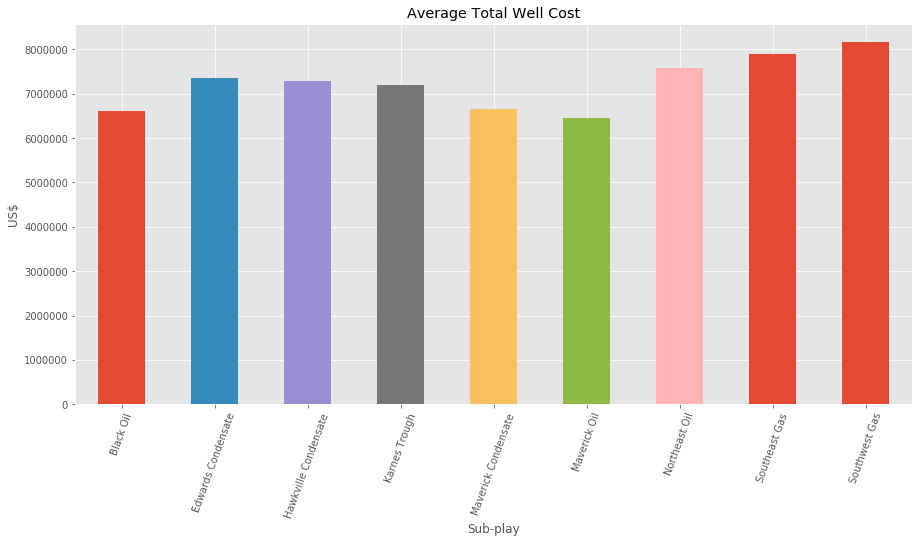

In [66]:
# Plot total cost averages
with plt.style.context('ggplot'):
    cost_avg['Well Cost Total (US$)'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Average Total Well Cost")
    plt.ylabel("US$")

    # Show plot
    plt.show()

# Normalize to MD

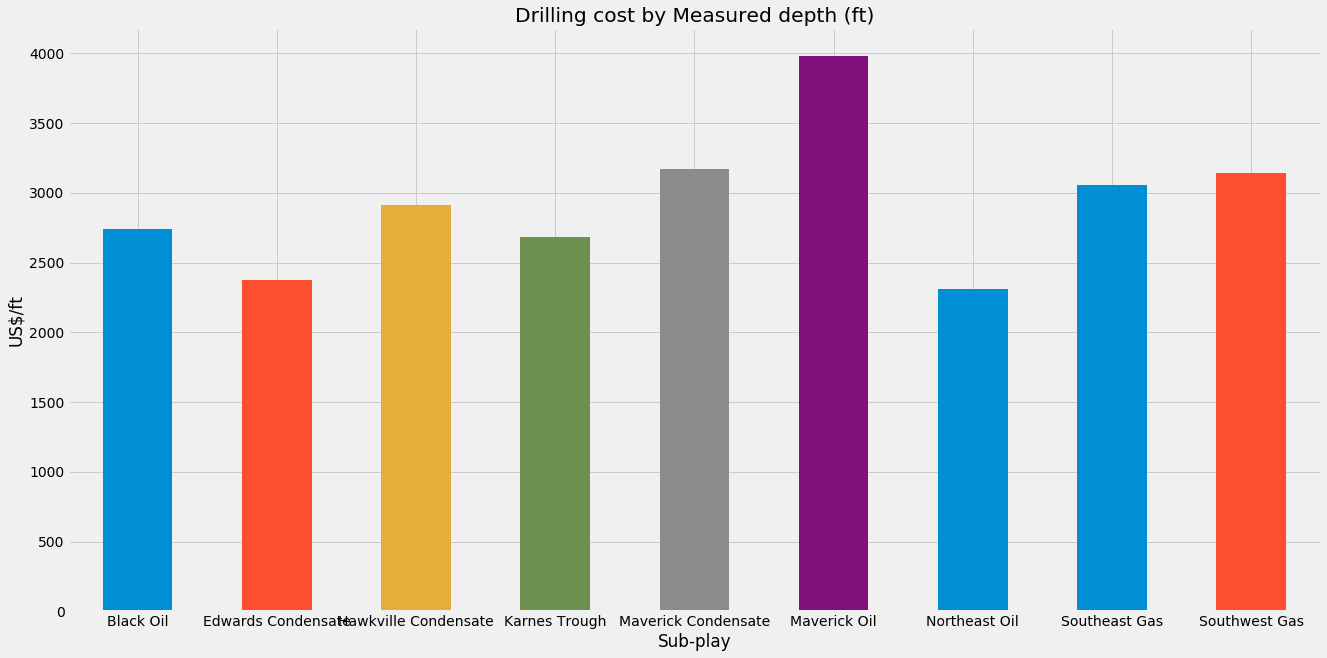

In [68]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg['CostPerFt'].plot(kind='bar',figsize=(20, 10))

    # Add axis labels and title
    plt.title("Drilling cost by Measured depth (ft)")
    plt.ylabel("US$/ft")

    # Show plot
    plt.xticks(rotation=0)
     # Save Figure
    plt.savefig("Drilling Cost Per Foot.png")
    
    plt.show()

###### The Maverick Oil Sub-Play is the most expensive area on average.

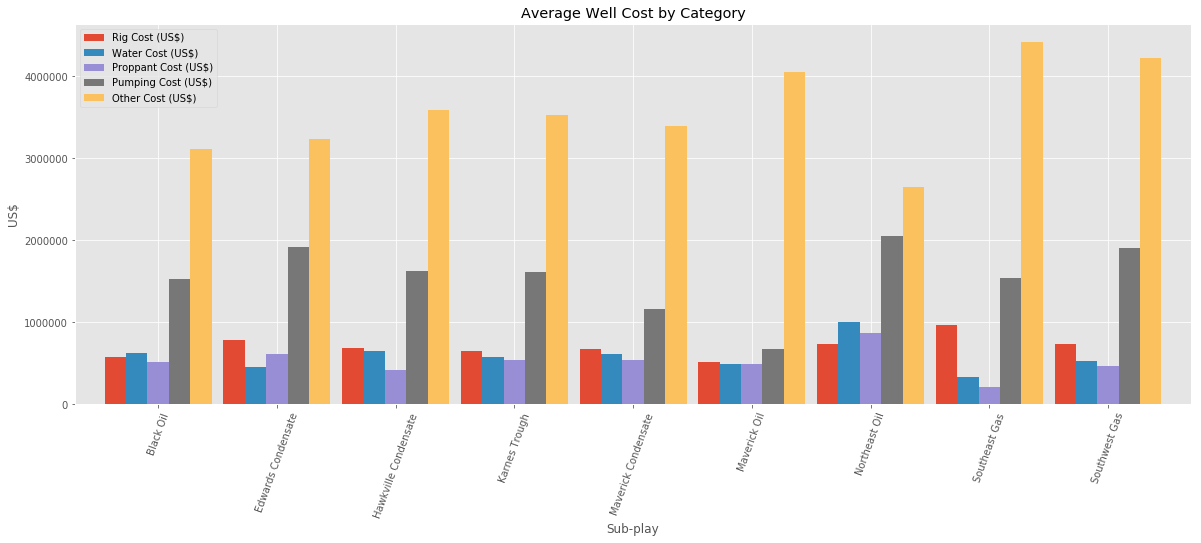

In [20]:
# Plot categorical costs 
with plt.style.context('ggplot'):
    cost_avg.loc[:,'Rig Cost (US$)':].plot(kind='bar',figsize=(20, 7),rot=70,width=.9)

    # Add axis labels and title
    plt.title("Average Well Cost by Category")
    plt.ylabel("US$")

    # Show plot
    plt.show()

###### Water and Proppant are indicative of completion methods.  Historically, completions have increased with time.

In [21]:
#ENTER STACKED BAR FOR SOME LOOPING
#https://stackoverflow.com/questions/49889398/plot-stacked-bar-chart-from-pandas-data-frame

# Costs #2

In [38]:
# Read Oil Pandas Data Frames
oil_data_df = pd.read_excel(file, sheet_name=0)

In [39]:
oil_data_df.head()

,API,Longitude,Latitude,Bottomhole longitude,Bottomhole latitude,Well Number,Lease Name,Well Type,Permit Type,Pad,...,IP Total (boe/d),EUR Oil (mmbbl),EUR Gas (bcf),EUR Total (mmboe),bi Oil,Di Oil (per month),Dmin Oil (per year),bi Gas,Di Gas (per month),Dmin Gas (per year)
0,42013342710000,-98.332847,28.954002,-98.331992,28.942858,1H,Little L & C,Oil,Horizontal,No,...,89.77,0.082,0.043,0.090,1.59,0.22,0.1,0.59,0.10,0.05
1,42013342730000,-98.455662,28.728584,-98.448771,28.714850,2H,Peeler Ranch,Oil,Horizontal,No,...,64.09,0.053,0.156,0.081,1.84,0.21,0.1,2.74,1.00,0.05
2,42013342780000,-98.470619,28.698830,-98.470619,28.698830,1H,Peeler Ranch,Oil,Horizontal,No,...,287.40,0.172,0.120,0.193,0.80,0.21,0.1,1.40,0.34,0.05
3,42013342790000,-98.450319,28.726421,-98.440780,28.715775,11H,Peeler Ranch,Oil,Horizontal,No,...,64.09,0.053,0.156,0.081,1.84,0.21,0.1,2.74,1.00,0.05
4,42013342850000,-98.439686,28.734653,-98.430205,28.724640,1H,Peeler Ranch Unit,Oil,Horizontal,No,...,139.48,0.105,0.119,0.125,1.24,0.19,0.1,1.86,1.00,0.05


In [42]:
# Drop all rows with missing information
cleaned_oil_df = oil_data_df.dropna(how='any')

In [43]:
# Show mulitple specific columns--note the extra brackets
cleaned_oil_df[["API", "Longitude","Latitude","Well Number","Well Type","Operator","Sub-play","Well Cost Total (US$)","EUR Total (mmboe)",'Cum365 Gas (mcf)',"Drilling Speed (m/day)"]].head(10)

,API,Longitude,Latitude,Well Number,Well Type,Operator,Sub-play,Well Cost Total (US$),EUR Total (mmboe),Cum365 Gas (mcf),Drilling Speed (m/day)
36,42013343510000,-98.179695,28.780553,22H,Oil,ExxonMobil,Karnes Trough,6466931.0,0.129,37592.0,183.17
67,42013343920000,-98.173404,28.784862,20H,Oil,ExxonMobil,Karnes Trough,5564731.0,0.129,37592.0,217.42
68,42013343940000,-98.300092,28.939989,1H,Oil,Earthstone Energy,Black Oil,3847818.0,0.113,29573.0,132.94
90,42013344250000,-98.152263,28.778206,1H,Oil,Marathon Oil,Karnes Trough,7150483.0,0.138,41831.0,231.51
93,42013344280000,-98.631494,28.800631,1H,Oil,Earthstone Energy,Black Oil,4930074.0,0.163,18106.0,76.22
101,42013344450000,-98.258464,28.809386,1H,Oil,EOG Resources,Black Oil,9425052.0,0.156,56949.0,223.90
110,42013344580000,-98.142740,28.766342,1H,Oil,Marathon Oil,Karnes Trough,6644082.0,0.241,72775.0,251.09
112,42013344620000,-98.200203,28.729091,1H,Oil,Marathon Oil,Karnes Trough,6214762.0,0.171,54995.0,230.81
121,42013344720000,-98.155223,28.760755,1H,Oil,Marathon Oil,Karnes Trough,7646863.0,0.271,71841.0,277.34
131,42013344850000,-98.227129,28.702232,1H,Oil,Marathon Oil,Karnes Trough,5616638.0,0.260,57664.0,319.72


In [45]:
#avg rig cost varabilable by subplay
rig_cost = cleaned_oil_df["Rig Cost (US$)"]
measured_depth = cleaned_oil_df["Measured Depth (m)"]

#rig cost by measured depth

rig_cost_by_measured_depth = rig_cost / measured_depth

In [46]:
# Build cost data frame# Build 
cost_df = pd.DataFrame({
                       'Sub-play':cleaned_oil_df['Sub-play'],
                       'County':cleaned_oil_df['County'],
                       'Well Cost Total (US$)':cleaned_oil_df['Well Cost Total (US$)'],
                       'Rig Cost (US$)':cleaned_oil_df['Rig Cost (US$)'],
                       'Water Cost (US$)':cleaned_oil_df['Water Cost (US$)'],
                       'Proppant Cost (US$)':cleaned_oil_df['Proppant Cost (US$)'],
                       'Pumping Cost (US$)':cleaned_oil_df['Pumping Cost (US$)'],
                       'Other Cost (US$)':cleaned_oil_df['Other Cost (US$)'],
                       'Lateral Length (m)': cleaned_oil_df['Lateral Length (m)'],
                       'Vertical Depth (m)': cleaned_oil_df['Vertical Depth (m)'],
                       'Measured Depth (m)': cleaned_oil_df['Measured Depth (m)'],
                       'EUR Total (mmboe)': cleaned_oil_df['EUR Total (mmboe)'],
                       'Cum365 Total (boe)': cleaned_oil_df['Cum365 Total (boe)'],
                       "Rig cost by depth": rig_cost_by_measured_depth
                       })

In [47]:
cost_df.head()

,Sub-play,County,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth
36,Karnes Trough,Atascosa,6466931.0,700321.0,360462.0,317805.0,370149.0,4390006.0,1909.0,3119.0,5129.0,0.129,26774.0,136.541431
67,Karnes Trough,Atascosa,5564731.0,600275.0,282989.0,273864.0,294318.0,3781883.0,1993.0,3120.0,5218.0,0.129,26774.0,115.039287
68,Black Oil,Atascosa,3847818.0,659702.0,178922.0,100949.0,346679.0,2326249.0,1036.0,2632.0,3722.0,0.113,36073.0,177.243955
90,Karnes Trough,Atascosa,7150483.0,471216.0,488230.0,178665.0,1177663.0,4542439.0,1280.0,3282.0,4630.0,0.138,55100.0,101.774514
93,Black Oil,Atascosa,4930074.0,1130918.0,214076.0,99206.0,398694.0,2861825.0,1199.0,2396.0,3659.0,0.163,49455.0,309.078437


In [48]:
# Calculate average costs# Calcu 
cost_avg = cost_df.groupby('Sub-play').mean()
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth
Sub-play,,,,,,,,,,,,
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556,130.667828
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557,94.182525
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547,115.453276
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000,111.176184
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871,126.069287
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000,72.338962
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000,115.266713


In [50]:
cost_avg.sort_values('Well Cost Total (US$)', ascending = False, inplace = True)
cost_avg
#the_cum_sum_well_cost =[]
the_cum_sum_well_cost = cost_avg.cumsum()['Well Cost Total (US$)']
the_cum_sum_well_cost

Sub-play
Hawkville Condensate    7.271146e+06
Maverick Condensate     1.413892e+07
Karnes Trough           2.089916e+07
Edwards Condensate      2.736791e+07
Black Oil               3.326507e+07
Southwest Gas           3.881681e+07
Maverick Oil            4.281564e+07
Name: Well Cost Total (US$), dtype: float64

In [51]:
cost_avg['Cumulative'] = the_cum_sum_well_cost

In [52]:
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth,Cumulative
Sub-play,,,,,,,,,,,,,
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547,115.453276,7.271146e+06
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871,126.069287,1.413892e+07
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000,111.176184,2.089916e+07
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557,94.182525,2.736791e+07
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556,130.667828,3.326507e+07
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000,115.266713,3.881681e+07
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000,72.338962,4.281564e+07


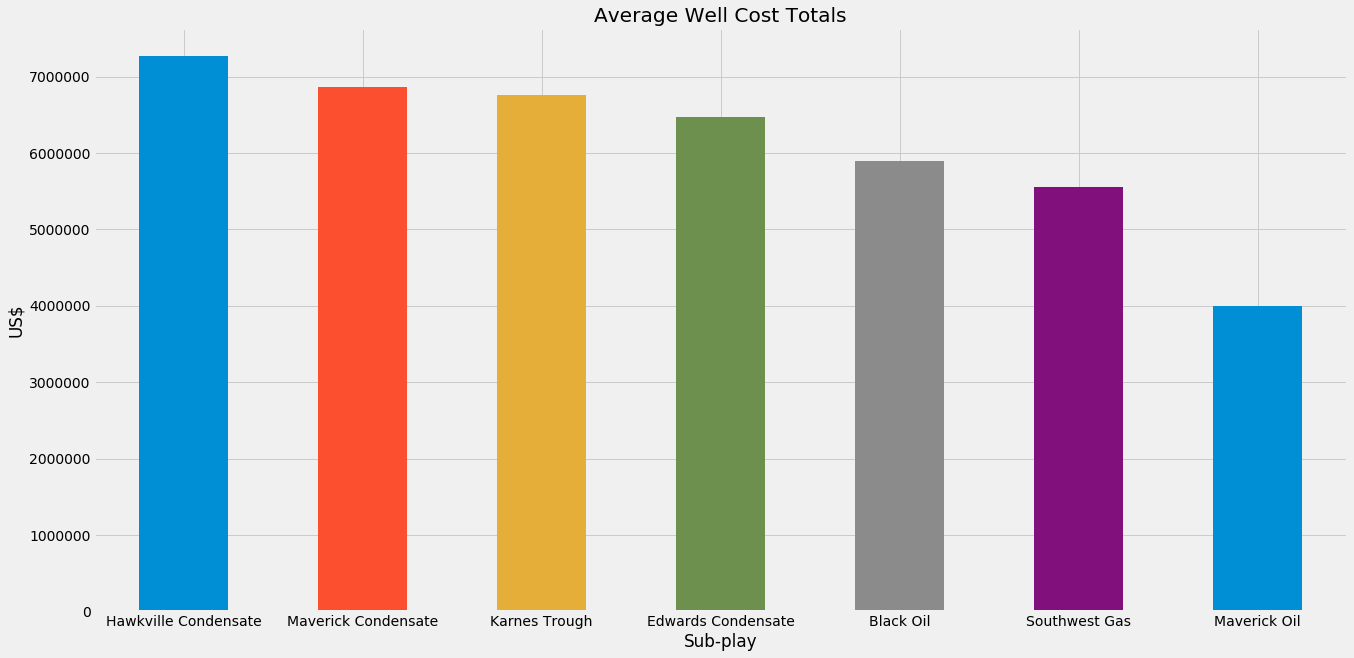

In [54]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg['Well Cost Total (US$)'].plot(kind='bar',figsize=(20, 10))

    # Add axis labels and title
    plt.title("Average Well Cost Totals")
    plt.ylabel("US$")

    # Show plot
    plt.xticks(rotation=0)
  # Save Figure
    plt.savefig("avg_sort.png")
    
    plt.show()

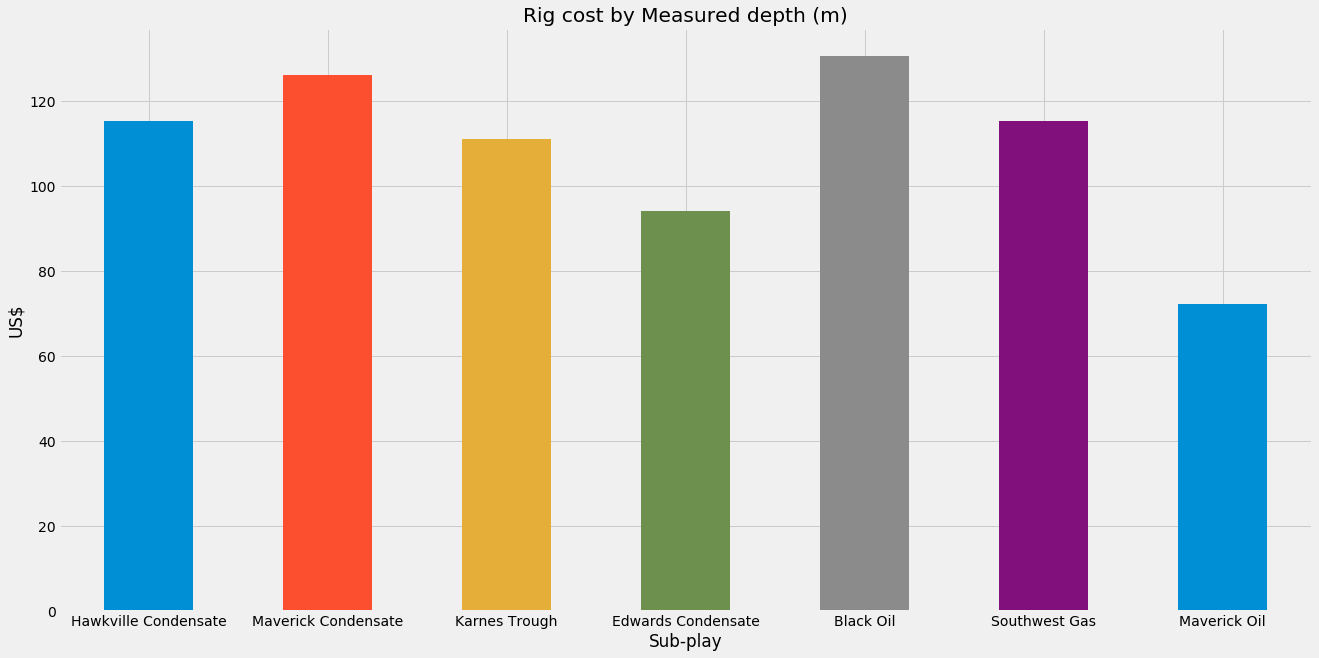

In [55]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg['Rig cost by depth'].plot(kind='bar',figsize=(20, 10))

    # Add axis labels and title
    plt.title("Rig cost by Measured depth (m)")
    plt.ylabel("US$")

    # Show plot
    plt.xticks(rotation=0)
     # Save Figure
    plt.savefig("rig_sort.png")
    
    plt.show()

###### Cost normalized by depth . Rig Cost per Meter. We should combine other.

# DEPTHS

In [26]:
# Import Excel file into data frame
eagleford_df = pd.read_excel("Eagle Ford Data.xlsx")

In [27]:
eagleford_df.columns.tolist()

['API',
 'Longitude',
 'Latitude',
 'Bottomhole longitude',
 'Bottomhole latitude',
 'Well Number',
 'Lease Name',
 'Well Type',
 'Permit Type',
 'Pad',
 'Operator',
 'Operator (Subsidiary)',
 'Operator (Original)',
 'Operator Thematic Group',
 'Operator US Focus',
 'Play',
 'Sub-play',
 'State',
 'County',
 'Region',
 'Basin',
 'Reservoir',
 'Field',
 'Permit Date',
 'Drilling Start Date',
 'Drilling End Date',
 'Completion Date',
 'First Production Date',
 'IP Date',
 'Vertical Depth (m)',
 'Measured Depth (m)',
 'Lateral Length (m)',
 'Drilling Days (days)',
 'Drilling Speed (m/day)',
 'Fracture Stages (stages)',
 'Water (l)',
 'Proppant (kg)',
 'API Gravity (degree)',
 'Well Cost Total (US$)',
 'Rig Cost (US$)',
 'Casing Cost (US$)',
 'Water Cost (US$)',
 'Proppant Cost (US$)',
 'Pumping Cost (US$)',
 'Other Cost (US$)',
 'Cum30 Oil (bbl)',
 'Cum60 Oil (bbl)',
 'Cum90 Oil (bbl)',
 'Cum180 Oil (bbl)',
 'Cum365 Oil (bbl)',
 'Cum30 Gas (mcf)',
 'Cum60 Gas (mcf)',
 'Cum90 Gas (mcf)',
 

In [28]:
# Build cumulative BOE data frame
cum_boe_df = pd.DataFrame({
                           'Sub-play':eagleford_df['Sub-play'],
                           'Cum30 Total (boe)':eagleford_df['Cum30 Total (boe)'],
                           'Cum60 Total (boe)':eagleford_df['Cum60 Total (boe)'],
                           'Cum90 Total (boe)':eagleford_df['Cum90 Total (boe)'],
                           'Cum180 Total (boe)':eagleford_df['Cum180 Total (boe)'],
                           'Cum365 Total (boe)':eagleford_df['Cum365 Total (boe)'],
                           'Lateral Length (m)':eagleford_df['Lateral Length (m)']
                           })

In [29]:
# Drop rows with missing cumulative data
cum_boe_df = cum_boe_df.dropna(axis=0,how='any')

In [30]:
# Create labels and bins 
bins = np.arange(cum_boe_df['Lateral Length (m)'].min(),cum_boe_df['Lateral Length (m)'].max(),200)
bins = bins + 0.9
labels = []
for i in range(len(bins)):
    if i == 0:
        labels.append('<'+str(int(bins[i])))
    elif i == len(bins)-1:
        labels.append('>'+str(int(bins[i])))
    else:
        labels.append(str(int(bins[i-1]))+"-"+str(int(bins[i])))
#labels = labels[1:]
print(labels)
print(bins)

['<235', '235-435', '435-635', '635-835', '835-1035', '1035-1235', '1235-1435', '1435-1635', '1635-1835', '1835-2035', '2035-2235', '2235-2435', '2435-2635', '2635-2835', '2835-3035', '3035-3235', '3235-3435', '3435-3635', '3635-3835', '3835-4035', '4035-4235', '>4435']
[ 235.9  435.9  635.9  835.9 1035.9 1235.9 1435.9 1635.9 1835.9 2035.9
 2235.9 2435.9 2635.9 2835.9 3035.9 3235.9 3435.9 3635.9 3835.9 4035.9
 4235.9 4435.9]


In [31]:
eagleford_df.groupby('Sub-play')['Vertical Depth (m)'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-play,,,,,,,,
Black Oil,4137.0,2579.597534,385.529270,782.0,2331.00,2593.0,2836.00,3810.0
Edwards Condensate,2926.0,3864.936090,230.378778,336.0,3709.00,3908.0,4030.75,4342.0
Hawkville Condensate,2678.0,2945.298730,392.650645,811.0,2607.25,3016.0,3225.75,4055.0
Karnes Trough,3617.0,3488.448714,237.399489,1500.0,3332.00,3494.0,3666.00,4080.0
Maverick Condensate,3096.0,2352.382752,256.468821,227.0,2173.00,2384.0,2537.00,2991.0
Maverick Oil,143.0,1843.573427,252.846680,975.0,1698.00,1870.0,2006.00,3132.0
Northeast Oil,389.0,2608.601542,359.387850,1748.0,2345.00,2573.0,2820.00,3719.0
Other Eagle Ford,32.0,2499.812500,610.062685,725.0,2269.25,2419.0,2546.50,4006.0
Southeast Gas,45.0,4137.266667,233.058167,3336.0,3984.00,4077.0,4376.00,4483.0


###### The mean vertical depth is the average depth of operator's target geological formation.  Indicative of sub-plays with deepest exploitable zones.

In [33]:
eagleford_df.groupby('Sub-play')['Lateral Length (m)'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-play,,,,,,,,
Black Oil,4078.0,1865.967141,466.579111,202.0,1519.00,1796.0,2120.00,4307.0
Edwards Condensate,2919.0,1596.188421,320.021409,618.0,1380.00,1581.0,1807.00,4451.0
Hawkville Condensate,2666.0,1801.573518,355.263777,688.0,1540.25,1749.0,2004.75,3307.0
Karnes Trough,3614.0,1532.978141,327.481201,521.0,1320.00,1522.5,1716.75,2953.0
Maverick Condensate,3092.0,1799.161384,400.236136,763.0,1554.00,1702.0,2006.00,4543.0
Maverick Oil,142.0,1759.816901,449.826328,237.0,1431.75,1667.0,2152.25,2589.0
Northeast Oil,381.0,2070.965879,385.671528,382.0,1834.00,2068.0,2339.00,2968.0
Other Eagle Ford,31.0,1825.322581,450.263581,550.0,1648.50,1882.0,2102.00,2472.0
Southeast Gas,45.0,1545.688889,245.995179,822.0,1405.00,1504.0,1700.00,2095.0


###### The mean lateral length is the average horizontal distance each operator's drilled. Possibly indicative of formation homogeneity.

# Exploration

Text(0,0.5,'Drilling Speed')

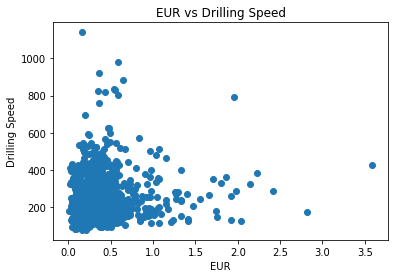

In [44]:
#EUR vs Max Temp Scatter

plt.scatter(cleaned_oil_df["EUR Total (mmboe)"], cleaned_oil_df["Drilling Speed (m/day)"])
plt.title("EUR vs Drilling Speed")
plt.xlabel('EUR')
plt.ylabel('Drilling Speed')

# MAPS

In [72]:
#differentiate between commodity
oil = df[(df['Well Type'] != 'Gas')]
gas = df[(df['Well Type'] == 'Gas')]

In [75]:
#Grab lat/longs for mapping
#lat/Longs for extent
lats = list(df['Latitude'])
lons = list(df['Longitude'])
#Lat/longs for oil
olats = list(oil['Latitude'])
olons = list(oil['Longitude'])
#Lat/longs for gas
glats = list(gas['Latitude'])
glons = list(gas['Longitude'])

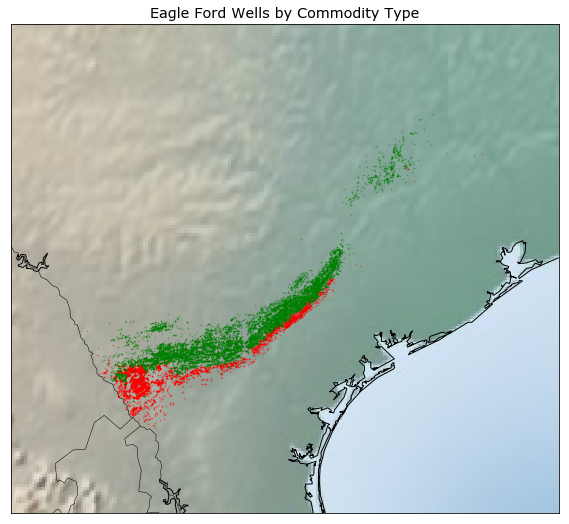

In [77]:
# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 12}
matplotlib.rc('font', **font)
   
# How much to zoom from coordinates (in degrees)
zoom_scale = 1

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(15,9))
plt.title("Eagle Ford Wells by Commodity Type")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#m.etopo()
m.shadedrelief()

for i in range(len(glons)):
    x,y = m(float(glons[i]), float(glats[i]))
    m.plot(x, y, marker = 'o', c='red', markersize=0.5, alpha=0.5, latlon=False)

for i in range(len(olons)):
    x,y = m(float(olons[i]), float(olats[i]))
    m.plot(x, y, marker = 'o', c='green', markersize=0.5, alpha=0.5, latlon=False)
 

# save the figure and show it
plt.savefig('EagleFordWells.png', format='png', dpi=96, transparent=True)
plt.show()